# Ecuaciones diferenciales ordinarias: el método de Euler

Recordemos que una **ecuación diferencial ordinaria (EDO)** es (aproximadamente) una ecuación en la cual aparece una (o más) derivada(s) de una función, y para la cual queremos buscar la función que satisface esta relación.

La EDO más simple no-trivial y físicamente relevante en una variable es 

$$\dot{x} = -\alpha \, x. \qquad (*)$$

[Recordemos la notación $\dot{x} := \textstyle \frac{dx}{dt}$, donde $t$ es el tiempo; es muy común en la física que las EDOs involucren derivadas con respecto al tiempo.]

Una solución a esta ecuación es un objeto $x$, tal que cuando la derivamos con respecto al tiempo, nos arroja $-\alpha$ (una constante) multiplicada por el mismo objeto. Implícitamente está claro que $x$ depende de $t$, por lo que realmente $x$ se refiere a una función de $t$, es decir $x: \mathbb{R} \to \mathbb{R}$ es la función $t \mapsto x(t)$. 

Por lo tanto, la ecuación $\dot{x} = -\alpha x$ se puede considerar como una ecuación *funcional*, es decir, una igualdad entre funciones. 

Para entenderla, se reescribe de forma más explícita como sigue:

$$\dot{x}(t) = -\alpha x(t) \qquad \text{para cada } t \in \mathbb{R}.$$

Ahora es una igualdad de números, que dice que la "velocidad" en el tiempo $t$ es un cierto múltiplo de la posición en ese momento. De esta forma queda más claro (en mi opinión).

Esto quiere decir que si *de alguna manera* hayamos logrado saber que la solución en el tiempo $t$ está en la posición $x(t)$, entonces nos indica cuál será la *velocidad* $\dot{x}(t)$ en este momento. Esta es la información que necesitaremos para actualizar la solución al "siguiente momento en el tiempo" de forma numérica.

La forma general de una EDO en una variable es

$$\dot{x} = f(x, t),$$

o sea

$$\dot{x}(t) = f(x(t), t) \qquad \text{para cada } t \in \mathbb{R}.$$

Recordemos que debe ir acompañada por una condición inicial $x(t=t_0) = x_0$ para que constituya un problema bien posado (*problema de valores iniciales*, o *problema de Cauchy*).
La solución de una ecuación de este tipo será una *función* $x(t)$ que satisface al mismo tiempo que $\dot{x}(t) = f(x(t), t)$ para cada $t$, y que $x(t=t_0) = x_0$. 

En el caso particular de la ecuación $\dot{x} = -\alpha x$, conocemos analíticamente la solución, y nos servirá para comprobar nuestros métodos. Pero para las ecuaciones de interés para la física, esto *casi nunca ocurre*, una situación que ¡suele pasar desapercibida durante la carrera! En estos casos, debemos aplicar distintas técnicas de *aproximación* de la solución, entre las cuales se destacan los *métodos numéricos*.

# Método de Euler

Para resolver una EDO numéricamente en la computadora, tendremos que *aproximar* la solución continua $x: t \mapsto x(t)$ con una versión con una cantidad finita de información, es decir, *discretizarla* de alguna forma.

La manera más sencilla de hacerla es utilizando *diferencias finitas*. Empezaremos con el caso más sencillo, el llamado *método de Euler*.

#### Ejercicio 1

(i) ¿Cuál es la aproximación más sencilla de la derivada $\dot{x}(t)$, en términos de un tamaño de paso pequeño $h$?

(ii) Aplica esta aproximación con la ecuación $\dot{x} = f(x, t)$ para obtener una expresión para $x(t+h)$, es decir el valor *predicho* en el siguiente *paso* de tiempo, en términos del valor ya conocido $x(t)$.

(iii) Implementa un paso de este *método de Euler* en una función `paso_euler` para una función `f` cualquiera. ¿Cuáles argumentos debe tomar?

(iv) Ahora implementa el método de Euler completo en una función `euler`.
Para hacerlo, crea un arreglo `ts` de los tiempos en los cuales se evaluará la función. Luego crea otro arreglo de ceros, con la función `zeros`. [Si pasas el arreglo `t` como argumento a esta función, creará un arreglo del mismo tamaño al poner `zeros(size(t))`.] Ahora implementa el paso (ii) en un algoritmo iterativo para actualizar los valores en el nuevo arreglo para cada tiempo sucesivamente.

(v) Verifica que funcione tu método al aplicarlo a una función $f(t)$ sencilla que dependa *únicamente del tiempo*. [Recuerda que debes imponer una condición inicial.] ¿Cuál operación matemática acabas de llevar a cabo? Compara con la solución analítica.

In [1]:
#(i)

La aproximación más sencilla para la derivada $\dot{x}(t)$ en términos de un $h$ pequeña es $$$$ $$\dot{x}(t)=\frac{x(t+h)-x(t)}{h}.$$

In [2]:
#(ii)

Aplicando la ecuación $\dot{x} = f(x, t)$ a la aproximación anterior obenemos que $$$$ $$x(t+h)=x(t)+hf(x,t) $$

In [3]:
#(iii)
function paso_euler(f,h,x0,t0)
    a=f(x0,t0)
    x1= x0+(h*a)
    return x1
end
g(x,t)=2t-3x+1
paso_euler(g,0.1,5,1) #esto lo hice para verificar, lo compare con un ejercicio en internet.

3.8

In [4]:
#(iv)
function euler(f,h,x0,t0,tf)
    ts=[]
    while t0<tf
        push!(ts,t0)
        t0=t0+h
    end
    A=zeros(size(ts))
    for i in range(1,length(ts))
        A[i]=paso_euler(f,h,x0,ts[i])
        x0=A[i]
    end
    return ts,A
end
f(x,t)=t+2x
euler(f,0.25,0,0,1)#Para verificar con un ejemplo que me encontre en internet.

(Any[0, 0.25, 0.5, 0.75], [0.0, 0.0625, 0.21875, 0.515625])

In [5]:
#(v)

El ejemplo más sencillo es el de $f(x,t)=t$. Si resolvemos la siguiente ecuación diferencial: $$ $$ $$\dot{x}(t)=t$$  $$$$ con condiciones iniciales $x(0)=0$ obtenemos como resultado $x(t)=\dfrac{t^{2}}{2}$. La gráfica de la solución es una parabola. 

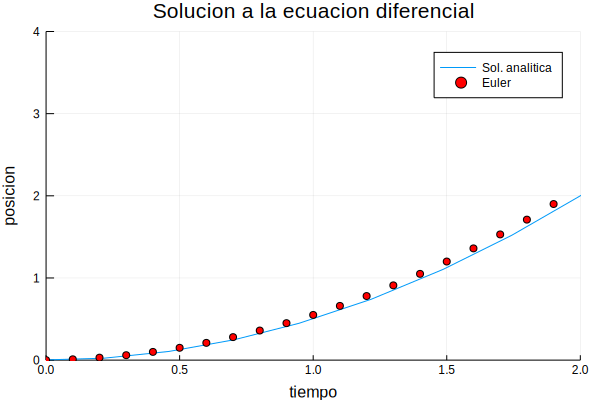

In [6]:
#(v)
using Plots
using SymPy
x=Sym("x")
t(x)=(x^2)/2
y(x,t)=t
plot(t(x),xlim=(0,2),ylim=(0,4),label="Sol. analitica",title="Solucion a la ecuacion diferencial")
scatter!(euler(y,0.1,0,0,2)[1],euler(y,0.1,0,0,2)[2],label="Euler",xlabel="tiempo",ylabel="posicion",color="red")

Acabamos de resolver una ecuacion diferencial de forma aproximada. Si comparamos los puntos con la linea, observamos que la aproximacion es bastante buena.

#### Ejercicio 2

(i) Utiliza tu función `euler` para resolver la ecuación $\dot{x} = -\alpha x$,  y compara tu solución numérica gráficamente con la solución analítica de la ecuación. ¿Qué pasa al variar el paso de tiempo? Hazlo interactivo.

(ii) Dado que el método de Euler utiliza una aproximación, el resultado no es exacto. Fija una $t$ final y calcula el error (desde la solución analítica) en función del tamaño de paso $h$. ¿Cómo es la convergencia en función de $h$?

In [7]:
#(i)

La solucion analitica de la ecuacion diferencial es $x(t)=e^{-\alpha x}$. Vamos a resolverla con el metodo de Euler para el caso $\alpha=1$ y con la condicion inicial $x(0)=1$.

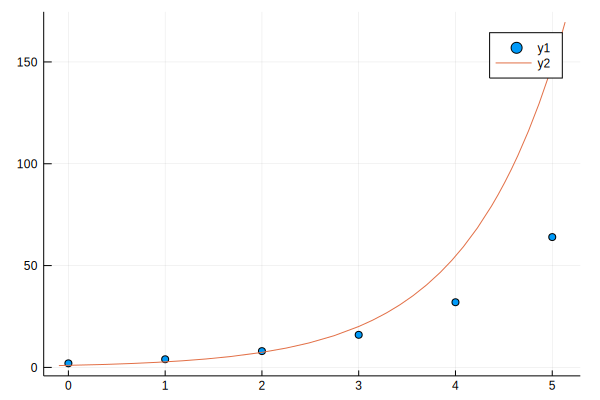

In [8]:
#(i)
x=Sym("x")
w(x)=exp(x)
v(x,t)=x
scatter(euler(v,1,1,0,6)[1],euler(v,1,1,0,6)[2])
plot!(w(x))

In [9]:
#(i) 
#Intento de hacerlo interactivo. 
using Interact
@manipulate for i in 0.1:0.1:1
    x=Sym("x")
    w(x)=exp(x)
    v(x,t)=x
    scatter(euler(v,i,1,0,6)[1],euler(v,i,1,0,6)[2])
    plot!(w(x),xlim=(0,6),ylim=(0,300))
end

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/2b6758317c30db80b0ae6e5c8bcb509a88627beb-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/2b6758317c30db80b0ae6e5c8bcb509a88627beb-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_02", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-21bd6596-99d5-4fda-a52a-0841eca7b29d", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["i"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 1.0),Pair{Symbol,Any}(:min, 0.1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 0.1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Float64}("ob_01", 0.5, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":0.5}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue

Con la grafica anterior podemos observar claramente que si $h$ se hace más pequeño, la precisión del método aumenta.

In [10]:
#(ii)Error del metodo de euler para t=4 fija.
y0=1.
D=[]
Y=[]
for i in range(1,10)
    push!(Y,y0)
    d=abs.(exp.(euler(v,1,1,0,5)[1])[end]-euler(v,y0,1,0,4)[2][end])
    push!(D,d)
    y0=y0-0.1
end

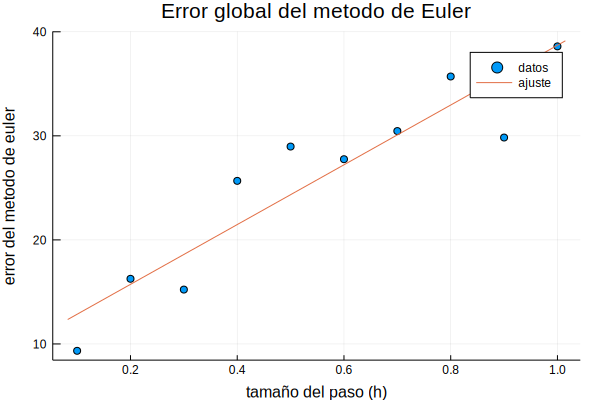

In [11]:
using SymPy
x=Sym("x")
α,β=linreg(Y,D)
y1(x)=α+(β*x)
scatter(Y,D,xlabel="tamaño del paso (h)",ylabel="error del metodo de euler",label="datos",title="Error global del metodo de Euler")
plot!(y1(x),label="ajuste")

Podemos concluir que el método de Euler tiene un error lineal $O(h)=h$.

#### Ejercicio 3

Considera la ecuación diferencial nolineal $\dot{x} = x \, (1-x)$, la cual modela la dinámica de una población; $x$ representa de alguna forma la densidad de población. 

(i) Dibuja el "campo vectorial" en el espacio $t$--$x$, es decir flechitas que indican en cuál dirección se camina en cada paso. 

[Pista: Utiliza la función `quiver`, con la sintaxis 

    quiver(xs, ys, vectorfield=(vxs, vys))
    
donde `xs` y `ys` son las coordenadas de las posiciones de las flechas, y `vxs` y `vys` las componentes de los vectores que dibujar.
]

(ii) Resúelvela numéricamente desde distintas condiciones iniciales (incluso las no-físicas) y dibuja las soluciones correspondientes. Interpreta el resultado de manera física (o biológica). 

In [12]:
#Esta funcion es para corregir un pequeno error que hubo con los arreglos.
#Esta soluciona el desfase, el arreglo que arroja empieza en x0 y t0. 
function euler2(f,h,x0,t0,tf)
    ts=[]
    while t0<tf
        push!(ts,t0)
        t0=t0+h
    end
    A=zeros(size(ts))
    for i in range(1,length(ts))
        A[i]=x0
        x0=paso_euler(f,h,x0,ts[i])
    end
    return ts,A
end
f(x,t)=t+2x
euler2(f,0.25,1,0,1)

(Any[0, 0.25, 0.5, 0.75], [1.0, 1.5, 2.3125, 3.59375])

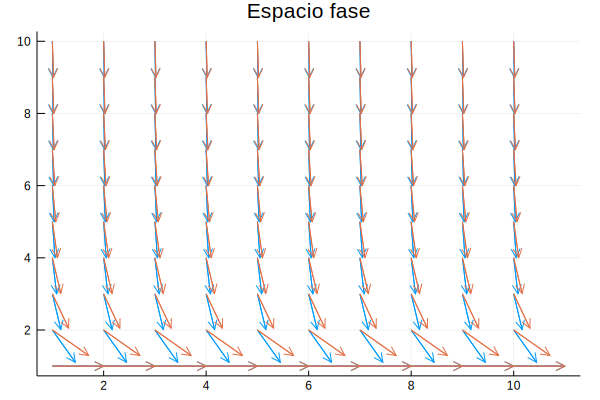

In [13]:
#(i)
#dibujemos el campo vectorial
xs=1:10
ts=1:10
tts = [t for t in ts for x in xs]
xxs = [x for t in ts for x in xs]
F(x, t) = x*(1-x)
dp(t,x) = normalize([1.0, F(x, t)])
dr(t,x) = normalize([2.0,F(x, t)])
quiver(tts,xxs,quiver=dp,title="Espacio fase")
quiver!(tts,xxs,quiver=dr)

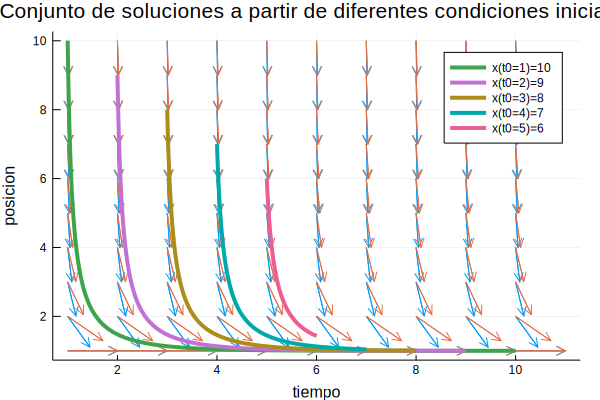

In [14]:
#(ii)
quiver(tts,xxs,quiver=dp,title="Conjunto de soluciones a partir de diferentes condiciones iniciales")
quiver!(tts,xxs,quiver=dr)
plot!(euler2(F,0.01,10,1,10),linewidth=4,label="x(t0=1)=10",xlabel="tiempo",ylabel="posicion")
plot!(euler2(F,0.01,9,2,9),linewidth=4,label="x(t0=2)=9")
plot!(euler2(F,0.01,8,3,8),linewidth=4,label="x(t0=3)=8")
plot!(euler2(F,0.01,7,4,7),linewidth=4,label="x(t0=4)=7")
plot!(euler2(F,0.01,6,5,6),linewidth=4,label="x(t0=5)=6")

## Varias variables

El método de Euler se extiende directamente a EDOs con más de una variable.

#### Ejercicio 4

(i) Escribe la ecuación diferencial que describe un oscilador armónico amortiguado.

(ii) Recuerda que hay un "truco" para reducir una ecuación diferencial de segundo orden a dos ecuaciones de primer orden; ¿cuál es? ¿Qué resulta en el caso del oscilador armónico amortiguado?

(iii) Deriva un método de Euler para las ecuaciones acopladas

$$\dot{x} = f(x, y);$$
$$\dot{y} = g(x, y).$$

Para hacerlo, aplica la definición de la derivada de nuevo.

(iv) Implementa el método.

(v) Aplícalo al oscilador armónico amortiguado.
Calcula trayectorias desde distintas condiciones iniciales y dibújalas, y ¡hazlo interactivo!
Debes dibujar tanto $x(t)$ y $y(t)$ como funciones del tiempo, como el **espacio fase**.  Dibuja también el campo vectorial en el espacio fase.

In [15]:
#(i)

La ecuacion que describe a un oscilador armonico amortiguado es  $$$$ $$ \frac{d^{2}x}{dt} + 2\zeta\omega_{0}\frac{dx}{dt}+\omega_{0}^{2}x=0.$$ Con $\omega_{0}=\sqrt{\dfrac{k}{m}}$  y  $\zeta=\dfrac{c}{2\sqrt{mk}}.$

In [16]:
#(ii)

Para reducir una ecuacion de segundo orden a un sistema de dos ecuciones de primer orden, realizamos un cambio de variable. Para nuestra ecuacion, hagamos $v=\dfrac{dx}{dt}$ entonces podemos obtener el siguiente sistema de ecuaciones $$\dfrac{dv}{dt}=-2\zeta\omega_{0}v-\omega_{0}^{2}x$$ $$v=\dfrac{dx}{dt}.$$

In [17]:
#(iii)


Sabemos que $$\dot{x}(t)=\frac{x(t+h)-x(t)}{h}.$$ $$$$ $$\dot{y}(t)=\frac{y(t+h)-y(t)}{h}.$$ $$$$ Depejando $x(t+h)$ y $y(t+h)$ y utilizando el cambio de variable que sugiere el problema, $$$$ $$x(t+h)=x(t)+hf(x,y)$$ $$y(t+h)=y(t)+hg(x,y)$$ 

In [18]:
#(iv)

In [19]:
function eulervec(f,g,h,x0,y0,t0,tf)
    ts=[]
    while t0<tf
        push!(ts,t0)
        t0=t0+h
    end
    A=zeros(size(ts))
    B=zeros(size(ts))
    for i in range(1,length(ts))
        A[i]=x0
        B[i]=y0
        x0=x0+(h*f(x0,y0))
        y0=y0+(h*g(x0,y0))
    end
    return ts,A,B
end

eulervec (generic function with 1 method)

In [20]:
#(v)

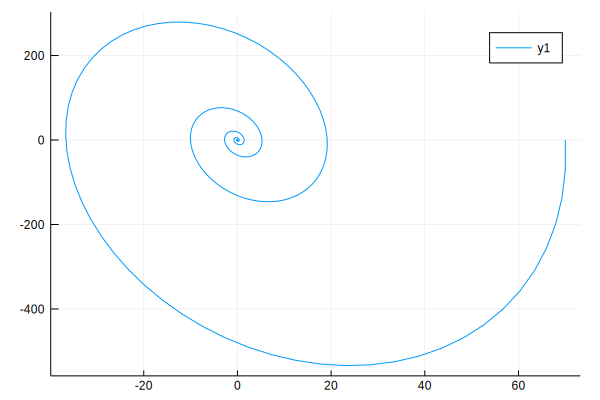

In [21]:
#espacio fase
a=0.2
o=10
f1(x, y) = y
g1(x, y) = (-2a * o * y) - (o^2 * x)
x0=70
y0=0
h = 0.01
t0=0
plot(eulervec(f1,g1,h,x0,y0,t0,t0+20)[2],eulervec(f1,g1,h,x0,y0,t0,t0+20)[3])

In [22]:
#x(t) contra t interactivo
@manipulate for o in 1:4:20, a in -0.05:0.02:0.2,x0 in 1:5:50
    f1(x, y) = y
    g1(x, y) = (-2a * o * y) - (o^2 * x)
    y0=0
    h = 0.01
    t0=0
    plot(eulervec(f1,g1,h,x0,y0,t0,t0+20)[1],eulervec(f1,g1,h,x0,y0,t0,t0+20)[3],xlabel="t",ylabel="posicion en y")
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_08", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-a71becea-9a6c-4a59-b267-4a7fa2874bc3", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["o"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 17),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 4),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_07", 9, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":9}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.comp

In [23]:
#y(t) contra t interactivo
@manipulate for o in 1:4:20, a in -0.05:0.02:0.2,y0 in 1:5:50,x0 in 1:5:50
    f1(x, y) = y
    g1(x, y) = (-2a * o * y) - (o^2 * x)
    h = 0.01
    t0=0
    plot(eulervec(f1,g1,h,x0,y0,t0,t0+20)[1],eulervec(f1,g1,h,x0,y0,t0,t0+20)[2],xlabel="t",ylabel="posicion en x")
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_20", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-44a3eaed-e620-40ea-ae08-8e217183570a", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["o"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 17),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 4),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_19", 9, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":9}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.comp

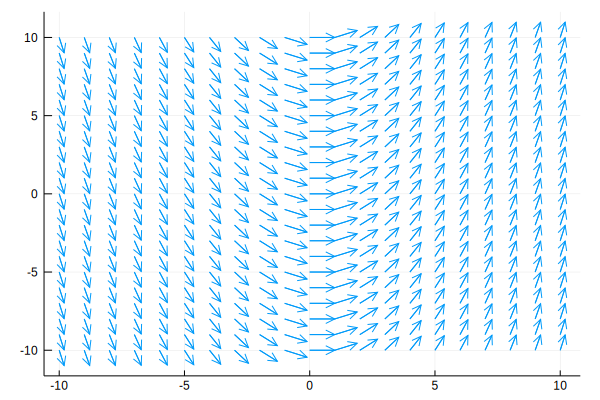

In [24]:
#campo vectorial
xs=-10:1:10
ts=-10:1:10
tts = [t for t in ts for x in xs]
xxs = [x for t in ts for x in xs]
a=-0.2
o=0.1
f1(x, y) = y
g1(x, y) = (-2a * o * y) - (o^2 * x)
dp(y,x) = normalize([2, f1(x, y)])
dr(y,x) = normalize([3,g1(x, y)])
quiver(tts,xxs,quiver=dp)
#quiver!(tts,xxs,quiver=dr)

## El enfoque vectorial

Recordemos que *cualquier* EDO, *incluídas las de orden superior* (es decir, con derivadas más altas que la primera de alguna función) se puede escribir de la siguiente manera, conteniendo únicamente primeras derivadas en el tiempo:

$$\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, t),$$

es decir

$$\dot{\mathbf{x}}(t) = \mathbf{f}(\mathbf{x}(t), t),$$

donde ahora $\mathbf{x} = (x_1, \ldots, x_n) \in \mathbb{R}^n$ es un vector y $\mathbf{f}: \mathbb{R}^n \to \mathbb{R}^n$ es una función vectorial, que nos da un **campo vectorial** que indica en cuál dirección moverse desde cada punto del espacio.

#### Ejercicio 5

(i) Escribe una función para hacer un paso del método de Euler para las ecuaciones acopladas

$$\dot{\mathbf{x}} = \mathbf{f}(\mathbf{x}, t).$$

El código ahora deberá ser *genérico*, es decir, debe funcionar para cualquier función $\mathbf{f}$ y vector $\mathbf{x}$.

(ii) Escribe el método de Euler completo. 

(iii) Úsalo para resolver la caída libre y una caída con fricción lineal en la velocidad. Compara con el resultado exacto cuando puedes. Dibuja las resultados con distintos tamaños de fricción.

(iv) Resuelve la caída libre con fricción cuadrática en la velocidad.

In [77]:
#ejercicios 1 y 2. 
function euler_vec2(f,x0,t0,tf,h)
    t = t0:h:tf
    m=length(x0)
    n=length(t)
    x=zeros((n,m))
    x[1,:]=x0
    for i in 2:length(t)
            x[i,:]=paso_euler(f,h,x[i-1,:],t[i-1],tf) 
        end
    return t,x
end

euler_vec2 (generic function with 1 method)

In [ ]:
#ejercicios 3 y 4

Para la caida libre tenemos que $$\dfrac{dv_{y}}{dt}=-g$$ $$$$ $$\dfrac{dy}{dt}=v_{y} $$.

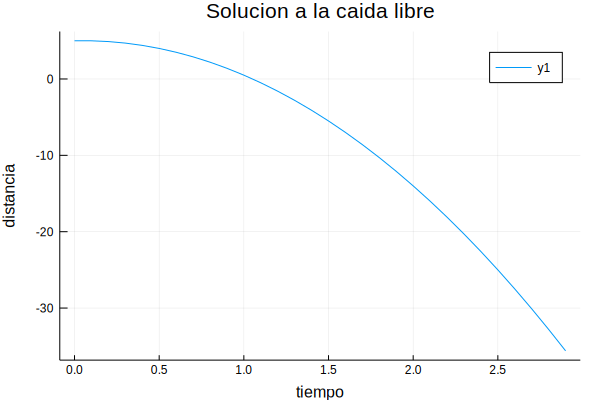

In [55]:
f21(x, y) = y
g21(x, y) = -10
plot(eulervec(f21,g21,h,0,0,t0,t0+3)[1],eulervec(f21,g21,h,5,0,t0,t0+3)[2],xlabel="tiempo",ylabel="distancia",title="Solucion a la caida libre")

La solucion analtica nos dice que $y=y_{0}+v_{0}t-\frac{gt^{2}}{2}$, como $v_{0}=0$, tenemos que $y=y_{0}-\frac{gt^{2}}{2}$. Lo cual, coincide con la forma parabolica que obtuvimos.

In [68]:
@manipulate for k in range(1,10)
    f22(x, y) = y
    g22(x, y) = -10*(1+y/k)
    plot(eulervec(f22,g22,h,0,0,t0,t0+3)[1],eulervec(f22,g22,h,5,0,t0,t0+3)[2],xlabel="tiempo",ylabel="distancia",title="Solucion a la caida libre con friccion lineal",ylimits=(0,5))
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_187", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-04dd1ef9-fdbd-48d8-8d67-745f589c49fa", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 10),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_186", 5, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":5}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.co

In [74]:
@manipulate for k in range(1,10)
    f24(x, y) = y
    g24(x, y) = -10*(1+(y*y)/k)
    plot(eulervec(f24,g24,h,0,0,t0,t0+3)[1],eulervec(f24,g24,h,5,0,t0,t0+3)[2],xlabel="tiempo",ylabel="distancia",title="Solucion a la caida libre con friccion cuadratica",ylimits=(0,5))
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_223", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-f6f79335-28cd-4629-a8b9-9e5aa8ca0a99", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 10),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_222", 5, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":5}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.co

Las soluciones que obtuvimos son parabolas que despues de un tiempo se vuelven rectas; lo cual coincide con la intuicion fisica de que un objeto en caida libre, enventualmente alcanza una velocidad terminal.

#### Ejercicio 6

(i) Resuelve numéricamente el problema del tiro parabólico con Euler para un proyectil que empieza en una altura $h>0$ con rapidez $1$ y ángulo inicial $\alpha$, *hasta que* caiga al suelo. [Pista: ¿Cómo puedes implementar esta condición en tu código? Haz una nueva función si sea necesario.]

(ii) Encuentra la distancia horizontal donde cae al suelo (el *rango*). Dibuja el resultado tal que puedas manipular interactivamente las condiciones iniciales. Encuentra numéricamente el ángulo que maximiza el rango. ¿Es correcto?

(iii) Agrega fricción del aire al problema y agrégalo como otro parámetro que puedas manipular. ¿Cómo cambia el resultado de la pregunta (ii)?

In [25]:
#(i)

Para un tiro parabolico, tenemos que resolver los siguientes sistemas de ecuaciones diferenciales acopladas, $$$$ $$\dfrac{dv_{y}}{dt}=-g$$ $$$$ $$\dfrac{dy}{dt}=v_{y} $$ y $$$$ $$\dfrac{dv_{x}}{dt}=0$$ $$$$ $$\dfrac{dx}{dt}=v_{x} $$ $$$$ con condiciones iniciales $x(0)=0$, $y(0)=h$, $v_{x}(0)=v_{0}cos(\theta)$ y $v_{y}(0)=v_{0}sin(\theta)$

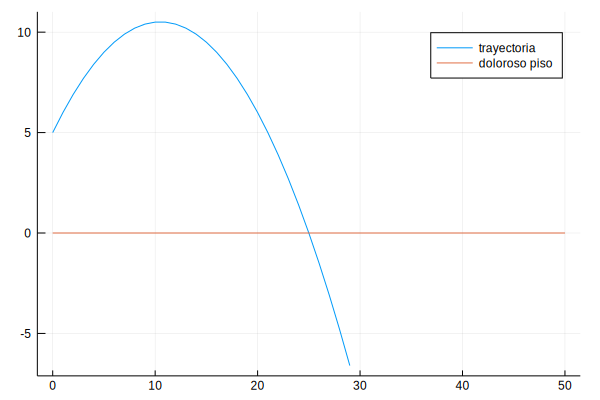

In [26]:
#(i)
f1(x, y) = y
g1(x, y) = 0
f2(x, y) = y
g2(x, y) = -10
ww(x)=0
vx=
vy=
h =0.1
t0=0
AA=[]
plot(eulervec(f1,g1,h,0,10,t0,t0+3)[2],eulervec(f2,g2,h,5,10,t0,t0+3)[2],label="trayectoria")
plot!([0,50],[0,0],label="doloroso piso")

La solucion del sistema es una trayectoria parabolica, tal como esperabamos.

In [43]:
@manipulate for θ in 1:1:90
    vx=1*cosd(θ)
    vy=1*sind(θ)
    h =0.1
    t0=0
    AA=[]
    plot(eulervec(f1,g1,h,0,vx,t0,t0+20)[2],eulervec(f2,g2,h,5,vy,t0,t0+20)[2],label="trayectoria",ylim=(-5,10),xlim=(0,10))
    plot!([0,50],[0,0],label="piso")
end

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_125", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-51960473-cc54-4d8a-8220-1499e7ea9fbb", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 90),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_124", 45, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":45}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.

El angulo que maximiza el rango es $\theta=5^{∘}$. Esto es consistente con el resultado analitico,  $$ $$ $$\theta = \tan^{-1} \left(\frac{v}{\sqrt{v^2 + 2gh}}\right).$$ $$ $$ Si hacemos $h=5 m$, $v=1 \frac{m}{s}$ y $g=9.81\frac{m}{s^{2}}$ obtenemos $\theta=5^{∘}$.

Para agregar resistencia del aire a nuestro problema utilizaremos el siguiente sistema de ecuaciones, $$$$ $$\dfrac{dv_{y}}{dt}=-g(1+\dfrac{v_{y}}{v_{t}})$$ $$$$ $$\dfrac{dy}{dt}=v_{y} $$ y $$$$ $$\dfrac{dv_{x}}{dt}=-g\dfrac{v_{x}}{v_{t}}$$ $$$$ $$\dfrac{dx}{dt}=v_{x} $$ $$$$ con condiciones iniciales $x(0)=0$, $y(0)=h$, $v_{x}(0)=v_{0}cos(\theta)$ y $v_{y}(0)=v_{0}sin(\theta)$

In [65]:
@manipulate for θ in 1:1:90, k in 1:1:40
    f31(x, y) = y
    g31(x, y) = -10*(y/k)
    f32(x, y) = y
    g32(x, y) = -10*(1+(y/k))
    vx=1*cosd(θ)
    vy=1*sind(θ)
    h =0.1
    t0=0
    AA=[]
    plot(eulervec(f31,g31,h,0,vx,t0,t0+20)[2],eulervec(f32,g32,h,5,vy,t0,t0+20)[2],label="trayectoria",ylim=(-5,10),xlim=(0,1))
    plot!([0,50],[0,0],label="piso")
end
#se esta variando la velocidad terminal, esa depende de una constante propia del fluido donde se prduce el movimiento

(div
  Widgets.Widget{:slider}(DataStructures.OrderedDict{Symbol,Any}(:changes=>Observables.Observable{Int64}("ob_167", 0, Any[WebIO.SyncCallback(WebIO.Scope("knockout-component-a7267473-75d1-449b-bd6f-7666612c65ea", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["θ"], Dict{Symbol,Any}(Pair{Symbol,Any}(:className, "interact "),Pair{Symbol,Any}(:style, Dict{Any,Any}(Pair{Any,Any}(:padding, "5px 10px 0px 10px")))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"text-align:right;width:18%"))), 2), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:max, 90),Pair{Symbol,Any}(:min, 1),Pair{Symbol,Any}(:attributes, Dict{Any,Any}(Pair{Any,Any}(:type, "range"),Pair{Any,Any}(Symbol("data-bind"), "numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}"))),Pair{Symbol,Any}(:step, 1),Pair{Symbol,Any}(:className, "slider slider is-fullwidth"),Pair{Symbol,Any}(:style, Dict{Any,Any}())), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"flex-grow:1; margin: 0 2%"))), 1), WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("data-bind"=>"text: displayedvalue"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"width:18%"))), 1)], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict("style"=>"display:flex; justify-content:center; align-items:center;"))), 7), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("changes", (Observables.Observable{Int64}(#= circular reference @-7 =#), nothing)),Pair{String,Tuple{Observables.Observable,Union{Bool, Void}}}("value", (Observables.Observable{Int64}("ob_166", 45, Any[WebIO.SyncCallback(WebIO.Scope(#= circular reference @-7 =#), WebIO.SyncCallback(WebIO.Scope(#= circular reference @-8 =#), WebIO.#37)), Observables.g]), nothing))), Set{String}(), nothing, Any["knockout"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout.js", "knockout_punches"=>"/home/hectormorales/.julia/v0.6/Knockout/src/../assets/knockout_punches.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/all.js", "/home/hectormorales/.julia/v0.6/InteractBase/src/../assets/style.css", "/home/hectormorales/.julia/v0.6/InteractBulma/src/../assets/main.css"], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":45}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        [this[\"displayedvalue\"]=ko.

Deforma la parabola en comparacion a la pregunta dos.

#### Ejercicio 7

En el caso del oscilador armónico, podemos hacer mucho de forma analítica. Pero no siempre es el caso:

(i) Escribe la ecuación diferencial ordinaria que modela un péndulo simple amortiguado.

(ii) Dibuja el campo vectorial y encuentra distintas trayectorias.

(iii) ¿Los resultados coinciden con la intuición física?

In [ ]:
#(i)

Para el pendulo simple amortiguado tenemos la siguiente ecuacion diferencial,
$$ml\ddot{\theta}=-mg\sin(\theta)-2ml\dot{\theta}\sqrt\frac{g}{l}.$$
Si hacemos $\omega^2=\frac{g}{l}$ tenemos que,
$$\ddot{\theta}=-\omega^2 \sin(\theta)-2\omega\dot{\theta}.$$

In [78]:
#(ii)

In [90]:
xs1=-100:100
ys1=-100:100
yys = [y for y in ys for x in xs1]
xx1s = [x for y in ys for x in ys1]
ω=34
TT(x,y) =y
TTT(x,y)=-ω^2*sind(x)-2*ω*TT(x,y)
dp(y,x) = normalize([TT(x, y),TTT(x,y)])

quiver(yys,xx1s,quiver=dp)

In [ ]:
#No supe muy bin como interpretar esto.